In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
# CIFAR-10 dataset is pre-existing in Keras.
# Importing the CIFAR dataset

from tensorflow.keras.datasets import cifar10

## <font color="red"> Image Data Pre-processing </font>

In [3]:
# CIFAR dataset already exists in the form of train and test data of (50000,10000) images respectively
# Have to use tuple unpacking to save the data in the data in the respective train and test datasets

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# 50000 images of 32*32 pixels with 3 color channels
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
# Getting single image dimensions
single_img = X_train[0]
single_img.shape

(32, 32, 3)

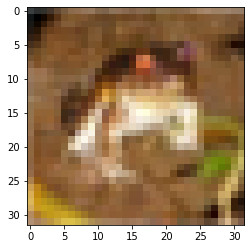

In [7]:
# See single 2D image
plt.imshow(single_img)

In [8]:
# Maximum Value of the single image
single_img.max()

255

In [9]:
# Now we need to do the scaling of the values only for the feature data
# and as we already know that the images shall always be channeled between 0-255 range, even for the color images
# so we can divide the feature data by 255 for performing the scaling

X_train = X_train/255

In [10]:
X_test = X_test/255

In [11]:
# As we can see the shape is still the same. We are only scaling the features.
X_train.shape

(50000, 32, 32, 3)

In [12]:
X_test.max()

1.0

In [13]:
# In the CIFAR-10 dataset the labels are the numbers.They represent the respective category of images
y_train
# We need to change the labels by dummy labels through one hot encoding as it is a multiclass classification problem

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
# "to_categorical" method creates the dummy variables and is the inbuilt method in keras
from tensorflow.keras.utils import to_categorical

In [15]:
# Current shape of y_train
y_train.shape

(50000, 1)

In [16]:
# Conversion of existing labels into dummy variables for training as well as test dataset
y_cat_test = to_categorical(y_test, num_classes=10)

In [17]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [18]:
y_cat_train.shape

(50000, 10)

In [19]:
y_cat_test.shape

(10000, 10)

In [20]:
# Unlike MNIST dataset model creation No need of reshaping the images 
# as the data is not required to be converted in grayscale
# We will work on the color pictures in this one

## <font color="red"> Creating and Training Model </font>

In [21]:
# Importing the "sequential Layer". Its basiclly required for the Input Layer
from tensorflow.keras.models import Sequential

In [22]:
# Importing "Dense" for the input layers
# Importing "Conv2D" for the Convulational Layers
# Importing "MaxPool2D" for the Pooling Later
# Importing "Flatten" for flattning out the images in to order to feed it to the last dense layer and perform the classifiaction

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [23]:
# As the data of images is more complex (32*32*3 = 3072) in comparision to the MNIST dataset 
# So we'll make multiple convulational and pooling layers

In [24]:
model = Sequential()

# First Layer of CNN is "Convulational Layer"

# Generally the "number of Filter" and the "kernel size" is taken in the multiple of 2
# In our case as the CIFAR-10 dataset is a bit more complex than MNIST dataset, so we'll take the 
# multiple convulational and pooling layers having-
    # filters as 32
    # Grid/Kernel_size as 4*4
    # Stride as (1,1)
# Generally filters amount are also expanded with each convulational layer but in our case we'll it as same
# We'll not be needing any padding as the our image size is 32 and hence when we divide the image size with the grid
# 32/4, we get proper whole integer as 8
# If we would have been getting the value in points then we could have added padding as "same"
# The "same" criteria of padding would have dealt with extra values
# In our case the default "valid" is fine as it doesnt apply padding
# and keeps the image as it is

# "Input_shape" is the shape of the image. In our case its (32,32,3) i.e width, Height, One color Channel
# Convulational Layer --------- 1

model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding='valid', input_shape=(32,32,3), activation="relu"))


# Second Layer of CNN is "Pool Layer"

# We have taken Pool size as (2,2). It is also the default size.
# In our case it is also the half of the grid size
# We can also add strides and padding in the pool layer as well

# Pool Layer --------- 1

model.add(MaxPool2D(pool_size=(2, 2)))


# Convulational Layer --------- 2

model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding='valid', input_shape=(32,32,3), activation="relu"))

# Pool Layer --------- 2

model.add(MaxPool2D(pool_size=(2, 2)))


# We can add multiple convulational and pool layers according to the complexity of data


# Third step is to flatten the images


# This means we have to convert the grid of the images into a single array
# i.e. grid of 32*32*3 has to be converted to array of 3072 (32*32*3=3072) in our case

model.add(Flatten())


# Fourth Layer of CNN is "Dense Layer"


# We can add multiple dense layers as per the complexity of the dataset
# Dense layer should generally be equal to flatten array i.e. in our case is 3072 (32*32*3=3072)
# But for now we'll add only one dense layer with 256 neurons which are more than the MNIST dataset
# But it is required as this model is using color images

model.add(Dense(256,activation="relu"))


# Fifth Layer of CNN is "Output Layer". It will be a dense layer


# The layer will have one neuron per class for the classification
# That's why In our case it will be 10 neurons in the final layer
# We'll use the softmax function as the activation function as we have multiclass classification problem

model.add(Dense(10, activation="softmax"))


# Final Step is to compile the model
# Loss parameter is generally taken as "categorical_crossentropy" for the classification problem
# optimizer is "adam"
# We can also add metrics. More documentation in relation to metrics can be found at "keras.io/metrics"

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## In the above cells there are 2 types of Hyperparameters- Changeable and Un-changeable

#### Un-Changeable

The parameters which are fixed and should be determine on the basis of your dataset are as follows:

1. model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding='valid',<font color="green"> input_shape=(32,32,3) </font>, activation="relu"))

2. <font color="green">model.add(Flatten())</font>

3. <font color="green">model.add(Dense(10, activation="softmax"))</font>

These are all <font color="cyan"> HYPERPARAMETERS</font> based on your data. <font color="cyan">There is correct value for them</font>


#### Changeable

1. <font color="green"> model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1)</font>, padding='valid', input_shape=(32,32,3) , <font color="green">activation="relu"</font>))

2. <font color="green">model.add(Dense(256,activation="relu"))</font>

These are <font color="cyan"> HYPERPARAMETERS you can experiment with</font>

In [25]:
# To see the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [26]:
# Training the Model with "early stopping call back" so that we dont have to choose the number of epochs

from tensorflow.keras.callbacks import EarlyStopping

In [27]:
# making the instance of "EarlyStopping"

# By default the monitor value is "Validation loss", we can also take the monitor value as "validation accuracy" 
# as we have given the metrics as "accuracy" during the model compilation

# Setting patience as 1. It will wait for 1 epoch to go up from the lowest validation loss level and
# then will stop the model

early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [28]:
# Training the model

model.fit(X_train,y_cat_train, epochs = 15, 
          validation_data = (X_test, y_cat_test),
          callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 78s 50ms/step - loss: 1.4909 - accuracy: 0.4625 - val_loss: 1.2746 - val_accuracy: 0.5487
Epoch 2/15
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1832 - accuracy: 0.5806 - val_loss: 1.1535 - val_accuracy: 0.5931
Epoch 3/15
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0488 - accuracy: 0.6304 - val_loss: 1.0533 - val_accuracy: 0.6311
Epoch 4/15
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9398 - accuracy: 0.6695 - val_loss: 0.9763 - val_accuracy: 0.6586
Epoch 5/15
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8562 - accuracy: 0.7005 - val_loss: 0.9535 - val_accuracy: 0.6687
Epoch 6/15
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7723 - accuracy: 0.7316 - val_loss: 0.9803 - val_accuracy: 0.6659
Epoch 7/15
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7082 - accuracy: 0.7518 - val_loss: 1.0625 -

## <font color="red"> Evaluating the Model </font>

In [29]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.490862,0.46246,1.274558,0.5487
1,1.183227,0.58064,1.153452,0.5931
2,1.048827,0.63042,1.053280,0.6311
3,0.939808,0.66954,0.976260,0.6586
4,0.856154,0.70054,0.953526,0.6687
5,0.772306,0.73162,0.980262,0.6659
6,0.708189,0.75182,1.062511,0.6384


<AxesSubplot:>

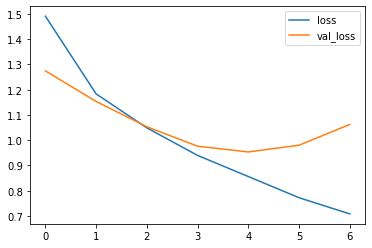

In [30]:
metrics[["loss","val_loss"]].plot()

<AxesSubplot:>

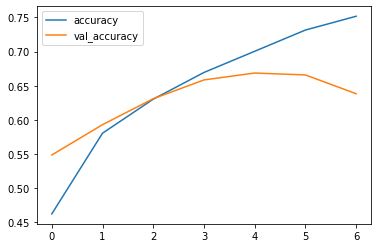

In [31]:
metrics[["accuracy","val_accuracy"]].plot()

In [32]:
# To know metrices available in the model

model.metrics_names

['loss', 'accuracy']

In [33]:
# Evaluating the model for the validation test

# First index in the list will be loss and the second index will be the accuracy of the validation test

# It shows[validation loss, validation accuracy]

model.evaluate(X_test, y_cat_test, verbose = 0)

[1.0625112056732178, 0.6384000182151794]

In [34]:
# Getting the predictions

from sklearn.metrics import classification_report, confusion_matrix

In [35]:
# "Predict_classes" will be used in our case as this is the multi classification problem
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [36]:
y_cat_test.shape

(10000, 10)

In [37]:
# we need to compare the predictions of the model to the actual labels
# i.e. instead of "y_cat_test", we'll compare it to y_test
# We dont have any longer need to use the classification ones as the model is already made

y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [38]:
# Comparing the true "y_test" values with our predicted values "predictions = model.predict_classes(X_test)"

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1000
           1       0.78      0.78      0.78      1000
           2       0.43      0.69      0.53      1000
           3       0.44      0.47      0.45      1000
           4       0.73      0.44      0.55      1000
           5       0.45      0.67      0.54      1000
           6       0.83      0.67      0.74      1000
           7       0.79      0.62      0.69      1000
           8       0.75      0.78      0.76      1000
           9       0.85      0.61      0.71      1000

    accuracy                           0.64     10000
   macro avg       0.68      0.64      0.65     10000
weighted avg       0.68      0.64      0.65     10000



In [39]:
confusion_matrix(y_test, predictions)

array([[669,  21, 115,  28,  11,  23,   7,   9, 102,  15],
       [ 30, 775,  27,  29,   5,  17,   8,   5,  52,  52],
       [ 41,   6, 694,  71,  30,  90,  38,  14,  11,   5],
       [ 12,   7, 135, 465,  22, 285,  31,  28,   9,   6],
       [ 23,   6, 211, 111, 440, 110,  28,  58,  13,   0],
       [  7,   3, 121, 137,  20, 670,   8,  22,   6,   6],
       [  6,   6, 131,  83,  17,  78, 665,   8,   4,   2],
       [ 14,   4,  81,  69,  46, 149,   4, 619,   4,  10],
       [ 60,  37,  50,  26,   7,  21,   4,   2, 778,  15],
       [ 36, 132,  50,  39,   2,  41,  13,  17,  61, 609]], dtype=int64)

<AxesSubplot:>

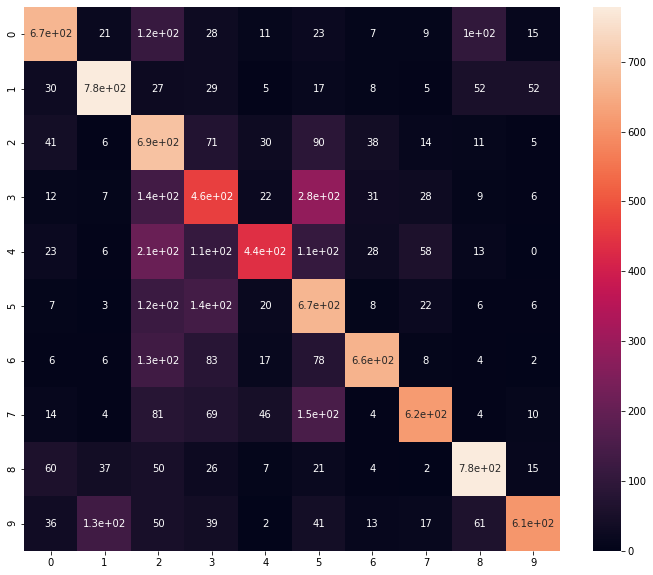

In [40]:
# To visualize the confusion matrix

import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

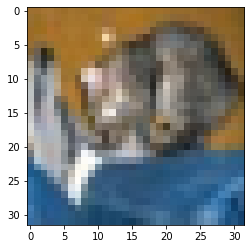

In [41]:
# To see the prediction

my_img = X_test[0]

plt.imshow(my_img)

In [42]:
# To know actually which images is this, as we are unable to see clearly

y_test[0]

array([3], dtype=uint8)

In [43]:
# The actual answer is the image is of Cat. As, we can verify the labels of the CIFAR-10 dataset on the google
# And label 3 is of Cat

In [44]:
X_test[0].shape

(32, 32, 3)

In [45]:
# Converting the image in the below written shape
# number of images, width, height, color channels
# feeding it into the model

model.predict_classes(my_img.reshape(1,32,32,3))

array([3], dtype=int64)

In [46]:
# Predicted the picture as Cat. Hence the model is successful

## <font color="red"> Trying the Model on External Images </font>


### 1. Trying model on External Images with big sizes than 28*28

In [47]:
from PIL import Image

In [66]:
# Opening the image
img = Image.open(r"C:\Users\iprak\Desktop\truck.jpg")

# Print the size of the image
print(img.size)

(311, 162)


In [67]:
# resize image and ignore original aspect ratio
img_resized = img.resize((32,32))

# report the size of the thumbnail
print(img_resized.size)

# Saving new image
img_resized.save(r'C:\Users\iprak\Desktop\img_resized.jpg')

(32, 32)


In [68]:
# Loading Compressed Image
img_example = Image.open(r"C:\Users\iprak\Desktop\img_resized.jpg")

In [69]:
# convert image to numpy array
data_example = np.asarray(img_example)
data_example.shape

(32, 32, 3)

In [70]:
# Reshaping image as taken by the model
data_reshape_example = data_example.reshape(1,32,32,3)

# To see new shape
data_reshape_example.shape

(1, 32, 32, 3)

In [71]:
# Predicting the number
model.predict_classes(data_reshape_example)

array([9], dtype=int64)

In [54]:
# Saving the model
model.save('CNN_on_CIFAR-10.h5')

### 2. Trying model on images with the size of 32*-32*-3

(32, 32, 3)


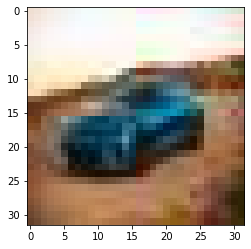

In [58]:
# Reading Image

a = plt.imread(r"C:\Users\iprak\Desktop\img_resized.jpg")
print(a.shape)
plt.imshow(a)

In [59]:
# Converting image into a numpy array
a_a = np.asarray(a)

# reshaping image as taken by the model
a_b = a_a.reshape(1,32,32,3)
print(a_b.shape)

# Predicting the number
model.predict_classes(a_b)

(1, 32, 32, 3)


array([1], dtype=int64)

### <font color="Magenta">Note: The model is working on external pictures. But Not Perfect</font>